In [16]:
import sys
from time import time
sys.path.append("../")

import itertools

import numpy as np
import matplotlib.pyplot as plt

import torch

In [17]:

filename = '1_pca.pt'
out_file = torch.load(filename)

out = out_file['out']
n_runs = out_file['n_runs']
methods_labels = out_file['methods_labels']
methods = out_file['methods']
problems = out_file['problems']

Ploting: test1
	 ploting: landing1
	 ploting: retraction1
	 ploting: regularization1
	 ploting: regularization2
Ploting: test2
	 ploting: landing1
	 ploting: retraction1


KeyError: 'retraction1'

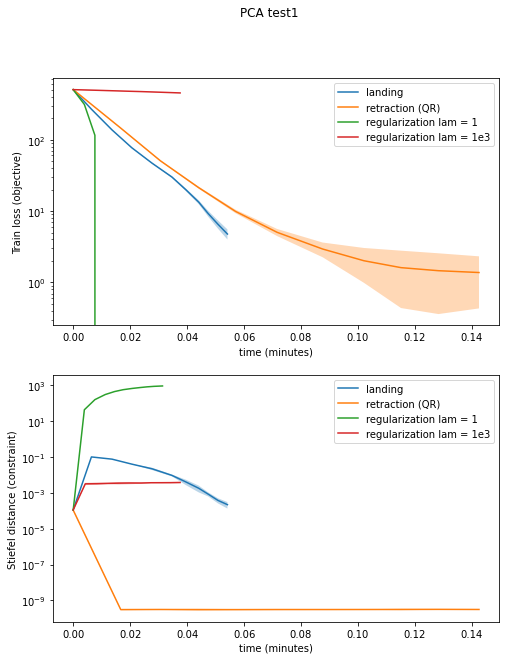

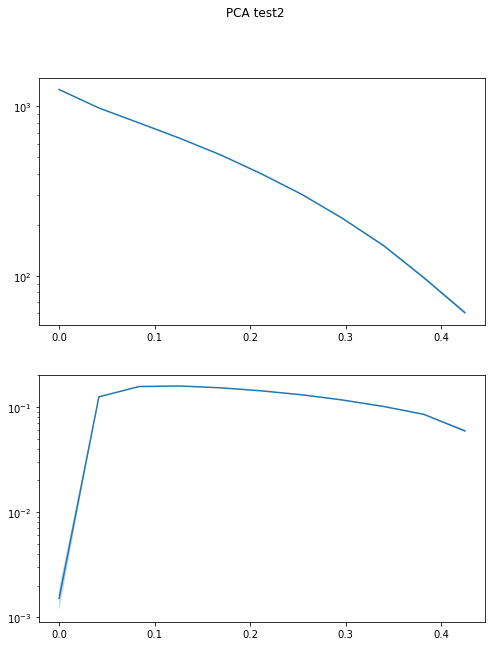

In [18]:
sdev_rho = 5

for problem_id in problems:
    problem_params = problems[problem_id]
    print('Ploting: '+ problem_id)
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    fig.suptitle('PCA '+problem_id)
    for method_id, method_label in zip(methods, methods_labels):
        method_params = methods[method_id]
        method_name = methods[method_id]['method_name']
        print("\t ploting: "+ method_id)
        out_tmp = out[problem_id][method_id]

        times_mins_mean = out_tmp['arr_time_list'].mean(axis=0) /60
        train_loss_mean = out_tmp['arr_train_loss'].mean(axis=0)
        train_loss_std = out_tmp['arr_train_loss'].std(axis=0)
        stiefel_distances_mean = out_tmp['arr_stiefel_distances'].mean(axis=0)
        stiefel_distances_std = out_tmp['arr_stiefel_distances'].std(axis=0)

        axs[0].semilogy(times_mins_mean, train_loss_mean, '-', label = method_label)
        axs[0].fill_between(times_mins_mean, train_loss_mean - sdev_rho*train_loss_std, train_loss_mean+sdev_rho*train_loss_std, alpha=0.3)
        axs[1].semilogy(times_mins_mean, stiefel_distances_mean, '-', label = method_label) 
        axs[1].fill_between(times_mins_mean, stiefel_distances_mean - sdev_rho*stiefel_distances_std, stiefel_distances_mean+sdev_rho*stiefel_distances_std, alpha=0.3)
        # , color=colors[method_name]
    
    axs[0].set_xlabel('time (minutes)')
    axs[0].set_ylabel('Train loss (objective)')
    axs[0].legend()
    axs[1].set_xlabel('time (minutes)')
    axs[1].set_ylabel('Stiefel distance (constraint)')
    axs[1].legend()

#fig.subplots_adjust(hspace=0.5)
#plt.savefig("plot_cifar10.pdf", dpi=150)
plt.show()


In [ ]:
train_loss_mean

array([ 5.0134560e+02,  4.4661542e+02,  3.9736132e+02,  3.5092553e+02,
        3.0817527e+02,  2.6961415e+02,  2.3551905e+02,  2.0558271e+02,
        1.7964364e+02,  1.5729012e+02,  1.3795116e+02,  1.2134688e+02,
        1.0699028e+02,  9.4508300e+01,  8.3718020e+01,  7.4198960e+01,
        6.5933500e+01,  5.8587160e+01,  5.2160820e+01,  4.6448920e+01,
        4.1271380e+01,  3.6716180e+01,  3.2634140e+01,  2.8928040e+01,
        2.5585480e+01,  2.2586420e+01,  1.9862100e+01,  1.7415120e+01,
        1.5117880e+01,  1.3093180e+01,  1.1155600e+01,  9.5142800e+00,
        7.9586000e+00,  6.5126000e+00,  5.2061000e+00,  4.0027600e+00,
        2.8999000e+00,  1.9234400e+00,  9.9282000e-01,  1.0290000e-01,
       -7.2526000e-01, -1.4314000e+00, -2.0909000e+00, -2.7135800e+00,
       -3.2396400e+00, -3.8057000e+00, -4.2998800e+00, -4.7126200e+00,
       -5.1927600e+00, -5.5432800e+00, -5.9046800e+00])

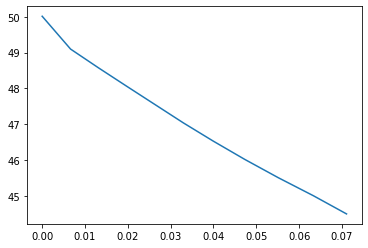

In [ ]:
plt.plot(out_tmp['arr_time_list'].mean(axis=0), out_tmp['arr_train_loss'].mean(axis=0))

In [7]:
times_mins_mean.shape

(5,)

In [16]:
out[problem_id][method_id]['arr_train_loss'] = np.array(out['test1']['landing1'][0]['train_loss'])

In [15]:
out[problem_id][method_id]['arr_train_loss'].shape

(11,)

In [9]:
out['test1']['landing1'][1]['train_loss']

[50.53163281249999,
 47.9003515625,
 45.28071484375,
 42.695234375,
 40.16635546875,
 37.712027343749995,
 35.34980859375,
 33.0895625,
 30.945789062499998,
 28.92503124999999,
 27.028328125]

In [28]:
for problem_params_key, method_name, method_params_key in itertools.product(problems_params, methods_names, methods_params):
    problem_params = problems_params[problem_params_key]
    method_params = methods_params[method_params_key]
    
    print('Running:')
    print(problem_params_key, method_name, method_params_key)
    out = run_pca_experiment(problem_params, method_name, method_params)
    #for i in range(n_runs):

Running:
test1 landing method_params1
Running:
test1 retraction method_params1
Running:
test1 regularization method_params1


In [23]:
problems_parameters[problem_parameters]

{'n_samples': 10000, 'n_features': 2000, 'p_subspace': 1000, 'noise_sdev': 0.1}

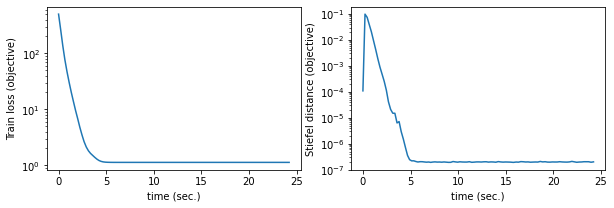

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
#fig.suptitle('PCA')

axs[0].semilogy(time_list, train_loss)
axs[0].set_xlabel('time (sec.)')
axs[0].set_ylabel('Train loss (objective)')

axs[1].semilogy(time_list, stiefel_distances)
axs[1].set_xlabel('time (sec.)')
axs[1].set_ylabel('Stiefel distance (objective)')

plt.show()

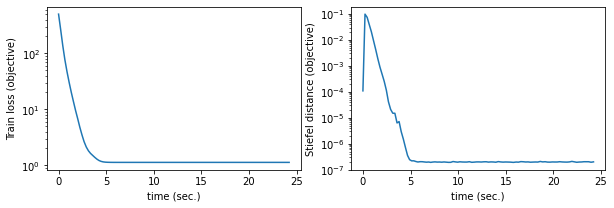

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
#fig.suptitle('PCA')

axs[0].semilogy(time_list, train_loss)
axs[0].set_xlabel('time (sec.)')
axs[0].set_ylabel('Train loss (objective)')

axs[1].semilogy(time_list, stiefel_distances)
axs[1].set_xlabel('time (sec.)')
axs[1].set_ylabel('Stiefel distance (objective)')

plt.show()


In [5]:
train_loss[-1]

1.1235000000000355

In [6]:
stiefel_distances[-1]

2.000509624622282e-07